<a href="https://colab.research.google.com/github/sugi-san/Sketch-Generation-with-Drawing-Process-Guided-by-Vector-Flow-and-Grayscale/blob/main/sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

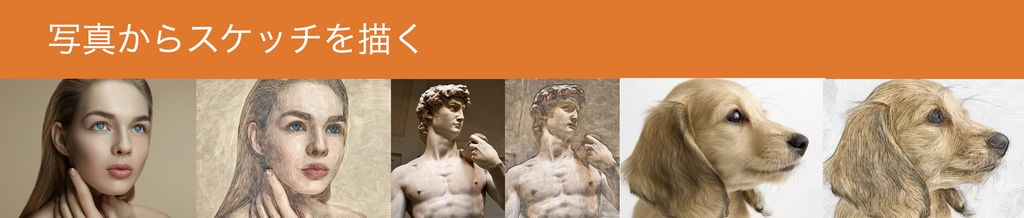

In [ ]:
#@title 1.セットアップ

# githubからコードをコピー
!git clone https://github.com/sugi-san/Sketch-Generation-with-Drawing-Process-Guided-by-Vector-Flow-and-Grayscale.git
%cd Sketch-Generation-with-Drawing-Process-Guided-by-Vector-Flow-and-Grayscale


# 表示関数
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

def display_pic(folder):
    fig = plt.figure(figsize=(20, 20))
    files = os.listdir(folder)
    files.sort()
    for i, file in enumerate(files):
        if file == '.ipynb_checkpoints':
          continue  
        img = Image.open(folder+'/'+file) 
        images = np.asarray(img)
        ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
        image_plt = np.array(images)
        ax.imshow(image_plt)
        ax.set_xlabel(file, fontsize=20)               
    plt.show()
    plt.close()


# サイズ調整関数
import cv2

def size_opt(file):
    max_size = 820
    npyImage = cv2.imread(filename = file, flags = cv2.IMREAD_COLOR)
    intWidth = npyImage.shape[1]
    intHeight = npyImage.shape[0]

    fltRatio = float(intWidth) / float(intHeight)
    intWidth = min(int(max_size * fltRatio), max_size)
    intHeight = min(int(max_size / fltRatio), max_size)

    # ピクセルを偶数にする
    if not intWidth % 2 == 0:
      intWidth +=1
    if not intHeight % 2 ==0:
      intHeight +=1

    npyImage = cv2.resize(src=npyImage, dsize=(intWidth, intHeight), fx=0.0, fy=0.0, interpolation=cv2.INTER_AREA)
    cv2.imwrite(file, npyImage)


# フォルダ内ファイル数カウント関数
def count_folder(path):
    folders = os.listdir(path)
    offset = 0 
    for folder in folders:
        if folder == '.ipynb_checkpoints':
          offset = 1
    num = len(os.listdir(path))-offset
    return num

# フォルダー作成
os.makedirs('input', exist_ok=True)
os.makedirs('download', exist_ok=True)

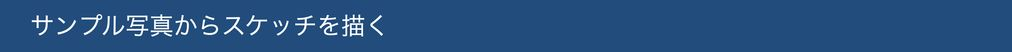

In [ ]:
#@title 2.画像表示
display_pic('pic')

In [ ]:
#@title 3.スケッチ作成（10分〜30分くらいかかります）
from draw import *
from PIL import Image
import glob
import shutil

# picフォルダの指定画像をinputフォルダへpicture.pngとリネームして保存
input = '02.jpg'#@param {type:"string"}
kakuchoshi = os.path.splitext(input)
if kakuchoshi[1] == '.jpg' or kakuchoshi[1] == '.jpeg':
  im = Image.open('./pic/'+input)
  im.save('./input/picture.png')
if kakuchoshi[1] == '.png':
  shutil.copy('./pic/'+input, './input/picture.png')

# outputフォルダーリセット
if os.path.isdir('output'):
    shutil.rmtree('output')
os.makedirs('output', exist_ok=True)

# 設定
file_name = 'picture.png'  # inputフォルダーにある画像名の指定
n = 10  # グレースケール量子化次数
period = 5  # 線（ストローク）幅 

# スケッチ作成
draw(file_name, n, period)

# 最後に120枚カラー画像を追加
import shutil
num = count_folder('output/picture/process')
for i in range(num, num+120):
   shutil.copy('output/picture/result_RGB.jpg', 'output/picture/process/'+str(i+1).zfill(4)+'.jpg')

# 動画作成
!ffmpeg -r 60 -i output/picture/process/%04d.jpg -vcodec libx264 -pix_fmt yuv420p -loglevel error output/picture/output.mp4

In [ ]:
#@title 4.動画の再生
from IPython.display import HTML
from base64 import b64encode

mp4 = open('output/picture/output.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="70%" height="70%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

In [ ]:
#@title 5.動画のダウンロード
import os
import shutil
from google.colab import files

name = os.path.splitext(input)
shutil.copy('output/picture/output.mp4', 'download/'+name[0]+'.mp4')
files.download('download/'+name[0]+'.mp4')

In [ ]:
#@title 6.完成画のダウンロード
import os
import shutil
from google.colab import files

name = os.path.splitext(input)
shutil.copy('output/picture/result_RGB.jpg', 'download/complete_'+name[0]+'.jpg')
files.download('download/complete_'+name[0]+'.jpg')

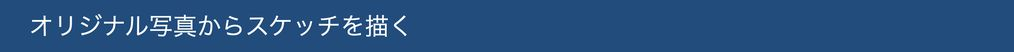

### オリジナル画像でやってみる

In [ ]:
#@title 7.画像のアップロード
import os
import shutil
from google.colab import files
import cv2

# ルートへ画像をアップロード
uploaded = files.upload()           
uploaded = list(uploaded.keys())    

# ルートからpicフォルダーへ移動
for file in uploaded:
    size_opt(file)  # サイズ調整して上書き
    img = cv2.imread(filename = file, flags = cv2.IMREAD_COLOR)  # 上書きしたものを再読み込み
    shutil.move(file, './pic/'+file)  # 移動

display_pic('pic')

In [ ]:
#@title 8.スケッチ作成（10分〜30分くらいかかります)
from draw import *
from PIL import Image
import glob
import shutil

# picフォルダの指定画像をinputフォルダへpicture.pngとリネームして保存
input = '001.jpg'#@param {type:"string"}
kakuchoshi = os.path.splitext(input)
if kakuchoshi[1] == '.jpg' or kakuchoshi[1] == '.jpeg':
  im = Image.open('./pic/'+input)
  im.save('./input/picture.png')
if kakuchoshi[1] == '.png':
  shutil.copy('./pic/'+input, './input/picture.png')

# outputフォルダーリセット
if os.path.isdir('output'):
    shutil.rmtree('output')
os.makedirs('output', exist_ok=True)

# 設定
file_name = 'picture.png'  # inputフォルダーにある画像名の指定
n = 10  # グレースケール量子化次数
period = 5  # 線（ストローク）幅 

# スケッチ作成
draw(file_name, n, period)

# 最後に120枚カラー画像を追加
import shutil
num = count_folder('output/picture/process')
for i in range(num, num+120):
   shutil.copy('output/picture/result_RGB.jpg', 'output/picture/process/'+str(i+1).zfill(4)+'.jpg')

# 動画作成
!ffmpeg -r 60 -i output/picture/process/%04d.jpg -vcodec libx264 -pix_fmt yuv420p -loglevel error output/picture/output.mp4

In [ ]:
#@title 9.動画の再生
from IPython.display import HTML
from base64 import b64encode

mp4 = open('output/picture/output.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="70%" height="70%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

In [ ]:
#@title 10.動画のダウンロード
import os
import shutil
from google.colab import files

name = os.path.splitext(input)
shutil.copy('output/picture/output.mp4', 'download/'+name[0]+'.mp4')
files.download('download/'+name[0]+'.mp4')

In [ ]:
#@title 11.完成画のダウンロード
import os
import shutil
from google.colab import files

name = os.path.splitext(input)
shutil.copy('output/picture/result_RGB.jpg', 'download/complete_'+name[0]+'.jpg')
files.download('download/complete_'+name[0]+'.jpg')

###【備考】
・ブラウザは、必ずGoogle Chromeを使用して下さい。

・動作がおかしくなった場合は、右上にある「ランタイム／ランタイムを出荷時設定にリセット」をクリックして、再度１番から順番に操作を行います。

・このノートを実行して閉じてから、すぐ再度実行する場合は、前の記憶が不完全に残っていて上手く動かないことがあります。その場合は、右上にある「ランタイム／ランタイムを出荷時設定にリセット」をクリックして、再度１番から操作を行います。
 
・長時間使用するとgoogleから使用制限を受ける場合がありますが、12h〜24h程度経つと使用制限が解除されます。